# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
netflix_titles = pd.read_csv('data/netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_titles.shape

(7787, 12)

In [4]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Cleaning the Data

Country: Some shows have (1) multiple countries and (2) some shows have Nan as values for countries.

For 1, we will select the first country within the list.

For 2, we will insert unknown for these shows.

In [5]:
netflix_titles['country'] = netflix_titles['country'].fillna('Unknown')
netflix_titles['country'] = [countries[0] for countries in netflix_titles['country'].str.split(',')]
netflix_titles['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Unknown',
       'Norway', 'United Kingdom', 'Japan', 'South Korea', 'Italy',
       'Canada', 'Indonesia', 'Romania', 'Spain', 'Iceland',
       'South Africa', 'France', 'Portugal', 'Hong Kong', 'Argentina',
       'Germany', 'Denmark', 'Kenya', 'New Zealand', 'Pakistan',
       'Australia', 'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Ja

In [6]:
netflix_titles['rating'] = netflix_titles['rating'].replace('NR','UR')
netflix_titles['rating'] = netflix_titles['rating'].fillna('UR')
netflix_titles['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'UR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

Duration: The duration for TV Shows are in Seasons, but it is in min for Movies. Only the number of each row will selected:

In [7]:
netflix_titles['duration'] = [int(duration[0]) for duration in netflix_titles['duration'].str.split(' ')]
netflix_titles['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64

Director and Cast: Note that some of cells in the Director, Cast and Date_Added columns are empty, will fill them with Unknown.

In [8]:
netflix_titles['director'] = netflix_titles['director'].fillna('Unknown')
netflix_titles['cast'] = netflix_titles['cast'].fillna('Unknown')

Date added: Dont really need to know month and date of when the show was added to their library - lets just focus on year.

In [9]:
netflix_titles["year"]= netflix_titles.date_added.apply(lambda x: str(x).split(",")[-1])

In [10]:
netflix_titles["year"].value_counts()

 2019    2153
 2020    2009
 2018    1685
 2017    1225
 2016     443
 2021     117
 2015      88
 2014      25
 2011      13
 2013      11
nan        10
 2012       3
 2009       2
 2008       2
 2010       1
Name: year, dtype: int64

Date_added: Going to fill missing values within Date_Added with Unknown

In [11]:
netflix_titles.date_added.fillna("Unknown",inplace= True)

In [12]:
netflix_titles.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
dtype: int64

In [13]:
netflix_titles['show_id'].unique
#There are 7787 different shows within the library (note that TV series Seasons are regarded as 1)

<bound method Series.unique of 0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
7782    s7783
7783    s7784
7784    s7785
7785    s7786
7786    s7787
Name: show_id, Length: 7787, dtype: object>

## What i know
(1) Total number of shows in the Netflix library - split by TV Shows and Movies.

(2) The categories these shows have been placed into and their respective ratings.

(3) The duration of these shows.

(4) When these shows were released and when they were added into the library.

(5) The country these shows were from.

(6) A short description of these shows.

## What i do not know
(1) How good these movies are.

(2) How many views these movies have gotten since getting into the library?

(3) How much these movies had cost to be produced?

# Problem Statements
(1) What is the breakdown of TV Shows and Movies on Netflix?

(2) How many shows have Netflix added onto thier library over the years?

(3) What is the breakdown of shows by year of release?

(4) How has Netflix curated their offerings - by categories and by ratings? Who does their library appeal to?

(5) What is the average length of a show on Netflix? - for TV Shows (by Seasons) for Movies (by minutes)

(6) Where does most of Netflix's show come from?

(7) Who are the top directors contributing to Netflix's library

## Answering Point 1:

In [14]:
netflix_titles.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Netflix, Inc. is an American over-the-top ("**OTT**") content platform and production company that has a total content library of 2,410 TV Shows and 5,377 movies.

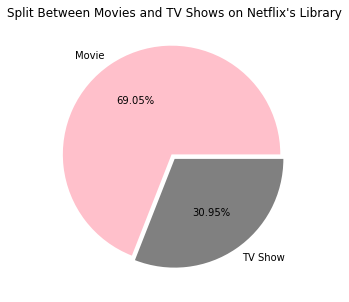

In [15]:
#What is the breakdown of TV Shows and Movies on Netflix?
plt.figure(figsize=(5,5))
plt.pie(netflix_titles['type'].value_counts(),
        labels=netflix_titles['type'].value_counts().index,
        explode=[0.05, 0],
        autopct='%1.2f%%',
        colors=['Pink','Grey'])
plt.title("Split Between Movies and TV Shows on Netflix's Library");


The pie chart above shows that Netflix offers more options for Movies as compared to TV Shows with the number of Movies being more than 2x the number of TV Shows on Netflix.

## Answering Point 2:

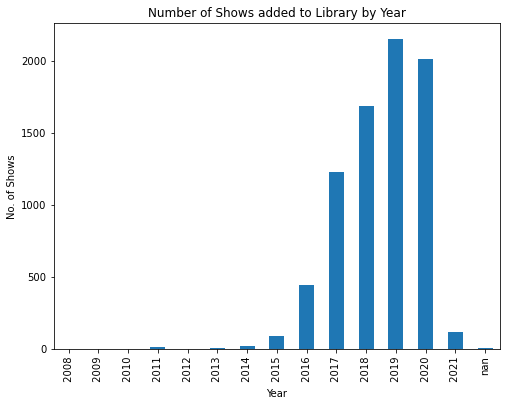

In [16]:
#How many shows have Netflix added onto thier library over the years?
plt.figure(figsize=(8,6))
netflix_titles['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of Shows')
plt.title('Number of Shows added to Library by Year');

In [17]:
netflix_titles.groupby('year').type.value_counts()

year   type   
 2008  Movie         1
       TV Show       1
 2009  Movie         2
 2010  Movie         1
 2011  Movie        13
 2012  Movie         3
 2013  Movie         6
       TV Show       5
 2014  Movie        19
       TV Show       6
 2015  Movie        58
       TV Show      30
 2016  Movie       258
       TV Show     185
 2017  Movie       864
       TV Show     361
 2018  Movie      1255
       TV Show     430
 2019  Movie      1497
       TV Show     656
 2020  Movie      1312
       TV Show     697
 2021  Movie        88
       TV Show      29
nan    TV Show      10
Name: type, dtype: int64

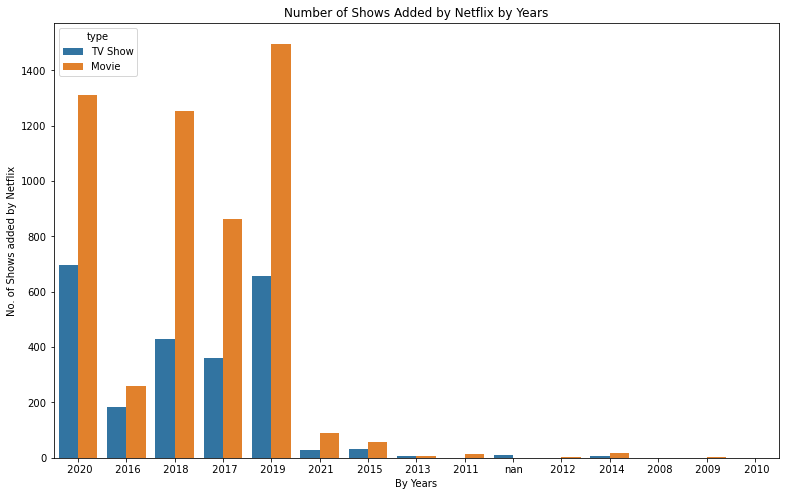

In [18]:
plt.figure(figsize=(13,8)) #Plotting the values obtained above
sns.countplot(x = netflix_titles['year'], hue = netflix_titles['type'])
plt.xlabel('By Years')
plt.ylabel('No. of Shows added by Netflix')
plt.title('Number of Shows Added by Netflix by Years');

The above shows that Netflix started to aggressively add onto their library starting 2017. With the bulk of their content being added between 2017-2020.

## Answering Point 3

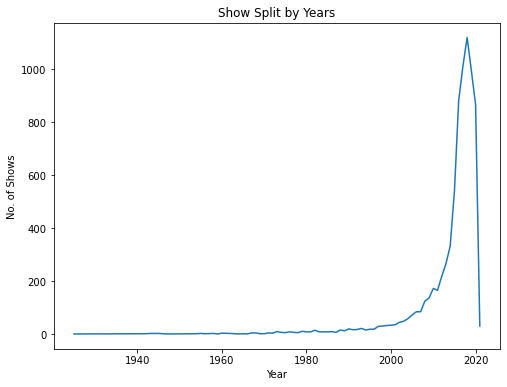

In [19]:
#What is the breakdown of shows by year of release?
plt.figure(figsize=(8,6))
netflix_titles['release_year'].value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('No. of Shows')
plt.title('Show Split by Years');

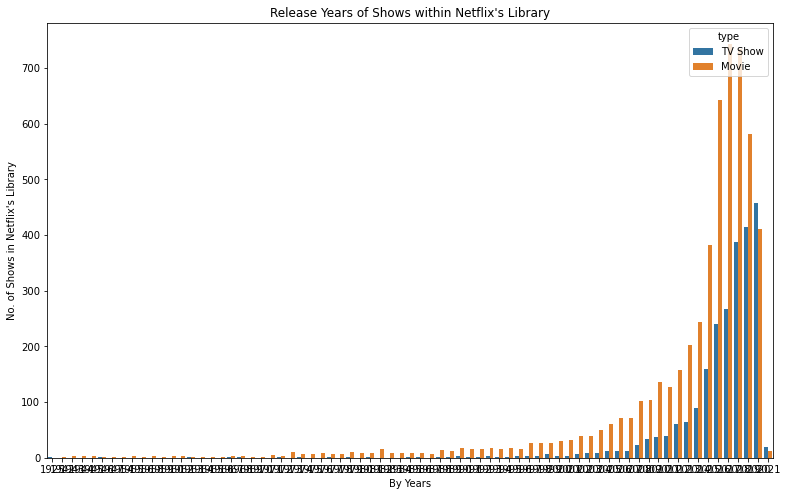

In [20]:
plt.figure(figsize=(13,8))
sns.countplot(x=netflix_titles['release_year'],hue=netflix_titles['type'])
plt.xlabel("By Years")
plt.ylabel("No. of Shows in Netflix's Library")
plt.title("Release Years of Shows within Netflix's Library");

In [21]:
def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<=2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None

netflix_titles['Movie_release_type'] = netflix_titles['release_year'].apply(release)

Movie_release_type  type   
Early 21st century  Movie      1820
                    TV Show     574
New                 Movie      3125
                    TV Show    1785
Old                 Movie       207
                    TV Show      32
Very old            Movie       201
                    TV Show      17
Name: type, dtype: int64


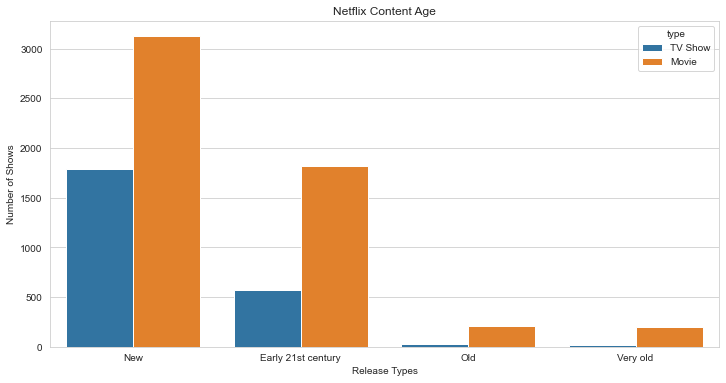

In [22]:
print(netflix_titles.groupby('Movie_release_type').type.value_counts())
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x=netflix_titles['Movie_release_type'],hue=netflix_titles['type'])
plt.xlabel('Release Types')
plt.ylabel('Number of Shows')
plt.title('Netflix Content Age');

The bulk of the content available on Netflix has been released in the period 2000-2021. If we see the graph from close, it can be seen that the concept of TV Shows were also not very prominent before 2000. 

It started gaining some popularity in the first decade of 21st century.

In [40]:
a=[]
b=[]

df=netflix_titles['release_year'].sort_values(ascending=True)[:5].to_frame()

for i in df.index:
    a.append(netflix_titles['release_year'].iloc[i])   #Using iloc to obtain corresponding values of a column using the value's index.
    b.append(netflix_titles['title'].iloc[i])
df2=pd.DataFrame(data={'Release year':a,'Title':b},index=[1,2,3,4,5])   #Creating a dataframe from the values obtained.
df2

,Release year,Title
1,1925,Pioneers: First Women Filmmakers*
2,1942,The Battle of Midway
3,1942,Prelude to War
4,1943,WWII: Report from the Aleutians
5,1943,Undercover: How to Operate Behind Enemy Lines


In [24]:
c=[]
d=[]
df=netflix_titles['release_year'].sort_values(ascending=False)[:5].to_frame()
for i in df.index:
    c.append(netflix_titles['release_year'].iloc[i])
    d.append(netflix_titles['title'].iloc[i])
df3=pd.DataFrame(data={'Release year':c,'Title':d},index=[1,2,3,4,5])
df3

,Release year,Title
1,2021,Night Stalker: The Hunt for a Serial Killer
2,2021,Charming
3,2021,Bling Empire
4,2021,Lupin
5,2021,Monarca


## Answering Point 4

Netflix focus from a Ratings perspective

In [25]:
netflix_titles['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'UR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

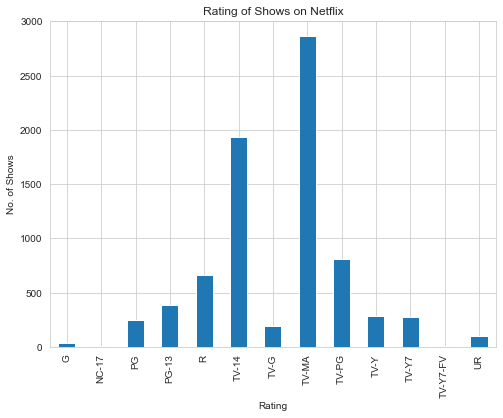

In [26]:
plt.figure(figsize=(8,6))
netflix_titles['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('No. of Shows')
plt.title('Rating of Shows on Netflix');

Note: Most of the content on Netflix is for Mature Audiences (TV-MA), followed by TV-14 (Parents strongly cautioned).

Kids friendly: 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG'

Teens focused: 'PG-13', 'TV-14'

Adults focused: 'R', 'NC-17', 'TV-MA' 

Unclassified: 'UR'

In [27]:
def group_by_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G', 'TV-G', 'PG', 'TV-PG']:
        new_ratin_group = 'Kids'
    elif rating in ['PG-13', 'TV-14']:
        new_ratin_group = 'Teens'
    elif rating in ['R', 'NC-17', 'TV-MA']:
        new_ratin_group = 'Adults'
    else:
        new_ratin_group = 'Unrated'
    return new_ratin_group 
    
netflix_titles['Show_rating'] = netflix_titles['rating'].apply(group_by_rating)

Show_rating  type   
Adults       Movie      2511
             TV Show    1020
Kids         Movie      1119
             TV Show     724
Teens        Movie      1658
             TV Show     659
Unrated      Movie        89
             TV Show       7
Name: type, dtype: int64


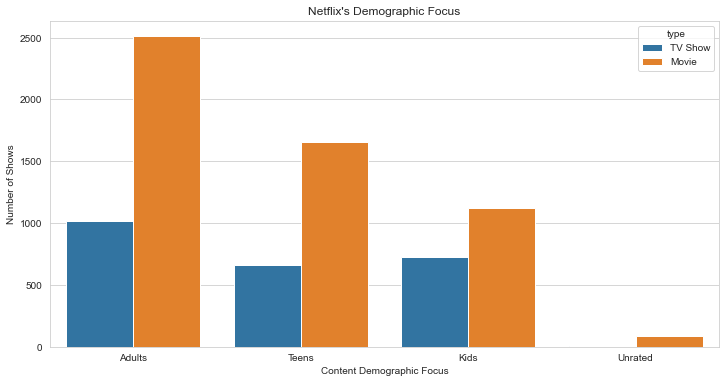

In [28]:
print(netflix_titles.groupby('Show_rating').type.value_counts())
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x=netflix_titles['Show_rating'],hue=netflix_titles['type'])
plt.xlabel('Content Demographic Focus')
plt.ylabel('Number of Shows')
plt.title("Netflix's Demographic Focus");

Netflix focus from a Genre perspective

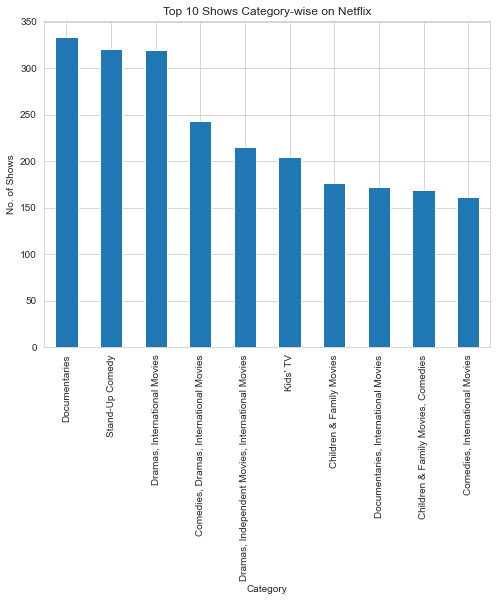

In [29]:
plt.figure(figsize=(8,6))
netflix_titles['listed_in'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('No. of Shows')
plt.title('Top 10 Shows Category-wise on Netflix');

In [30]:
print(netflix_titles['listed_in'].value_counts()[:10])

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64


Top 10 list of Genres above reflect Netflix's focus demgoraphics of Adults.

## Answering Point 5

In [31]:
#What is the average length of a show on Netflix? - for TV Shows (by Seasons) for Movies (by minutes)

ax = netflix_titles.groupby('type')['duration'].mean()
ax1 = netflix_titles.groupby('type')['duration'].max()
ax2 = netflix_titles.groupby('type')['duration'].min()
print(ax)
print(ax1)
print(ax2)

type
Movie      99.307978
TV Show     1.775934
Name: duration, dtype: float64
type
Movie      312
TV Show     16
Name: duration, dtype: int64
type
Movie      3
TV Show    1
Name: duration, dtype: int64


Movie: Min is 3 minutes; Average is 99.3 minutes; Max is 312 minutes.

TV Show: Min is 1 season; Average is 1.78 season; Max is 16 seasons.

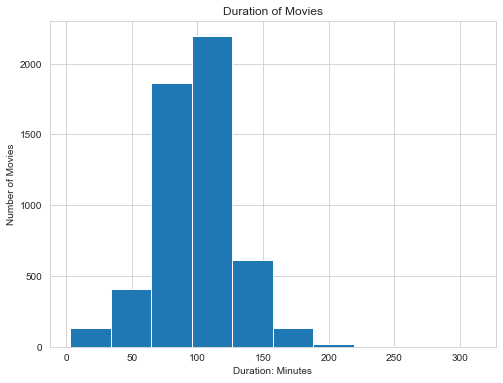

In [32]:
plt.figure(figsize=(8,6))
netflix_titles[netflix_titles.type=='Movie']['duration'].plot(kind='hist')
plt.ylabel('Number of Movies')
plt.xlabel('Duration: Minutes')
plt.title('Duration of Movies');

In [33]:
netflix_titles[netflix_titles.type=='Movie'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,Movie_release_type,Show_rating
957,s958,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,New,Adults
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020,Very old,Teens
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020,Very old,Teens


Longest Movie is Black Mirror: Bandersnatch

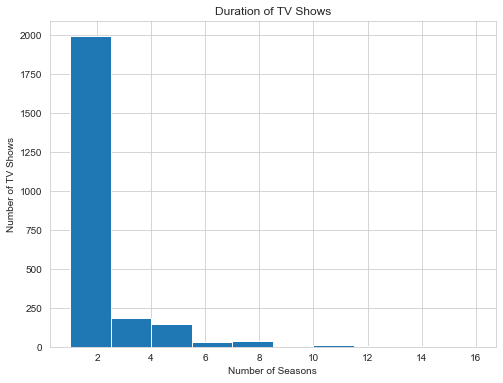

In [34]:
plt.figure(figsize=(8,6))
netflix_titles[netflix_titles.type=='TV Show']['duration'].plot(kind='hist')
plt.ylabel('Number of TV Shows')
plt.xlabel('Number of Seasons')
plt.title('Duration of TV Shows');

Most of the TV Shows on Netflix have 1 to 2 Seasons

In [35]:
netflix_titles[netflix_titles.type=='TV Show'].sort_values(by='duration', ascending=False).head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,Movie_release_type,Show_rating
2538,s2539,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",2019,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020,New,Teens
4438,s4439,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018,New,Teens
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,"June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020,New,Teens


Longest Series on Netflix is Grey's Anatomy

## Answering point 6

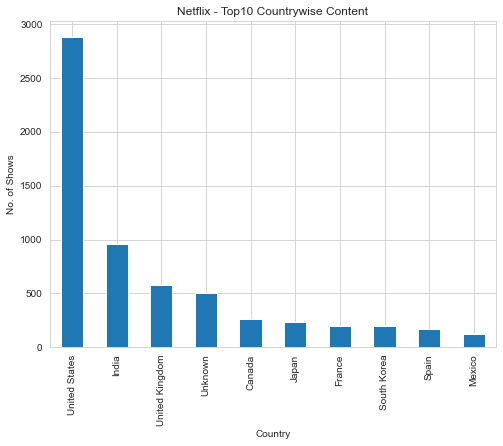

In [36]:
#Where does most of Netflix's show come from?

plt.figure(figsize=(8,6))
netflix_titles['country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('No. of Shows')
plt.title('Netflix - Top10 Countrywise Content');

In [37]:
print('Top 10 Movie Creators:')
print(netflix_titles.groupby('type').country.value_counts()['Movie'][:10])
print('\n')
print('Top 10 TV Show Creators:')
print(netflix_titles.groupby('type').country.value_counts()['TV Show'][:10])

Top 10 Movie Creators:
country
United States     2100
India              883
United Kingdom     341
Unknown            230
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Name: country, dtype: int64


Top 10 TV Show Creators:
country
United States     783
Unknown           277
United Kingdom    236
Japan             162
South Korea       152
Canada             84
India              73
Taiwan             70
France             59
Australia          52
Name: country, dtype: int64


Top 5 countries when it comes to availability and creation of movies:- USA, India, UK, Cananda, France

Top 5 countries when it comes to availability and creation of TV Shows:- USA, UK, Japan, South Korea, Canada

The above could be an indicator to Netflix's target geography. Most users are possibly from North America and English speaking Europe

## Answering point 7

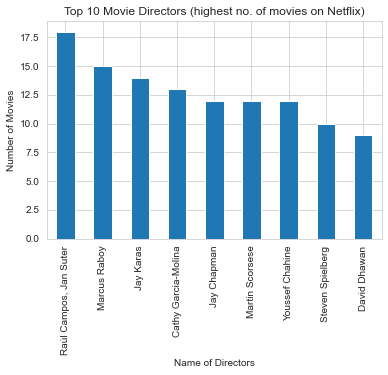

In [38]:
netflix_titles.groupby('type').director.value_counts()['Movie'][1:10].plot(kind='bar') #removed unknowns
plt.ylabel('Number of Movies')
plt.xlabel('Name of Directors')
plt.title('Top 10 Movie Directors (highest no. of movies on Netflix)');

Movie director with most number of Movies on Netflix: Raul Campos, Jan Suter

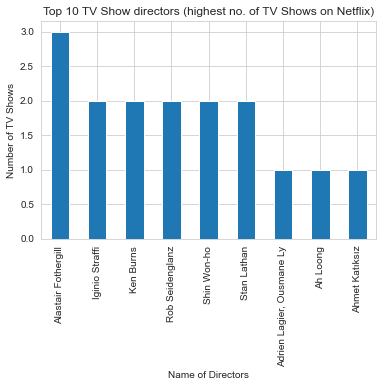

In [39]:
netflix_titles.groupby('type').director.value_counts()['TV Show'][1:10].plot(kind='bar') #removed unknowns
plt.ylabel('Number of TV Shows')
plt.xlabel('Name of Directors')
plt.title('Top 10 TV Show directors (highest no. of TV Shows on Netflix)');

TV Show director with most number of TV Shows on Netflix: Alastair Fothergill